#Liberaries#

In [92]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,roc_curve,roc_auc_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
import missingno as msng
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from xgboost import XGBClassifier,XGBRegressor

from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,LeaveOneOut,GroupKFold,StratifiedGroupKFold,GroupShuffleSplit,TimeSeriesSplit

#LOAD_DATA_COPY#

In [93]:
df=pd.read_csv("/content/drug200.csv")
new_df=df.copy()
new_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


#ENCODING

In [94]:
new_df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [95]:
le = LabelEncoder()
label = le.fit_transform(new_df['Sex'])
new_df.drop("Sex", axis=1, inplace=False)
new_df['Sex'] = label

In [96]:
new_df['Sex'].unique()

array([0, 1])

In [97]:
new_df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [98]:
le = LabelEncoder()
label = le.fit_transform(new_df['BP'])
new_df.drop("BP", axis=1, inplace=False)
new_df['BP'] = label

In [99]:
new_df['BP'].unique()

array([0, 1, 2])

In [100]:
new_df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [101]:
le = LabelEncoder()
label = le.fit_transform(new_df['Cholesterol'])
new_df.drop("Cholesterol", axis=1, inplace=False)
new_df['Cholesterol'] = label

In [102]:
new_df['Cholesterol'].unique()

array([0, 1])

In [103]:
new_df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [104]:
le = LabelEncoder()
label = le.fit_transform(new_df['Drug'])
new_df.drop("Drug", axis=1, inplace=False)
new_df['Drug'] = label

In [105]:
new_df['Drug'].unique()

array([0, 3, 4, 1, 2])

#EDA#

In [106]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [107]:
new_df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [108]:
new_df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


#CORRELATION

In [109]:
corr = new_df.corr()
corr

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


In [110]:
corr.iloc[:,5].sort_values(ascending=False)

Drug           1.000000
BP             0.419397
Cholesterol    0.048415
Age            0.041856
Sex            0.018239
Na_to_K       -0.689051
Name: Drug, dtype: float64

<Axes: >

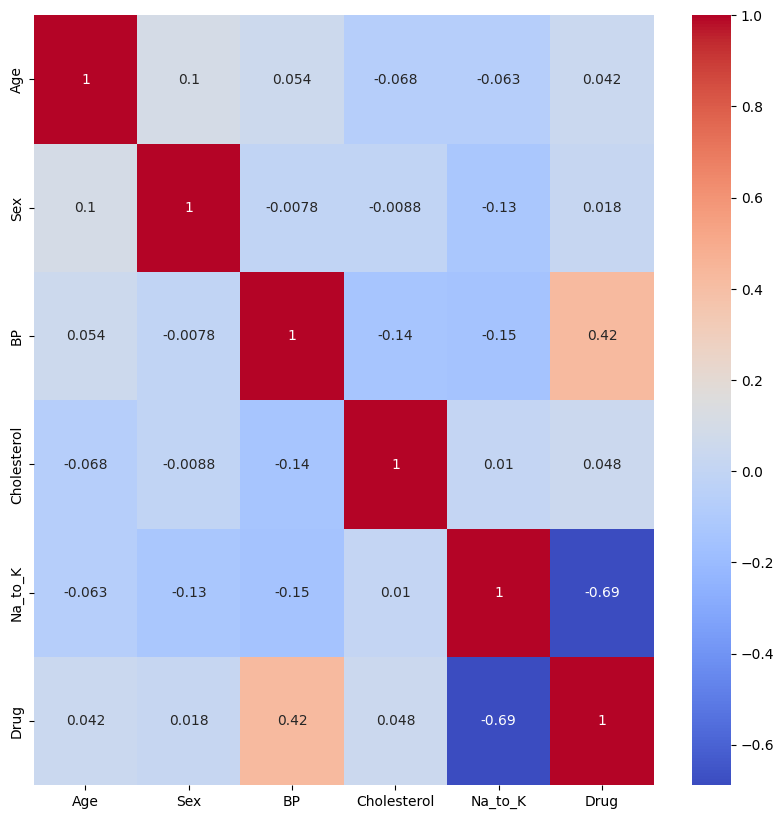

In [111]:
plt.figure( figsize=(10,10))
sns.heatmap(new_df.corr() , annot=True , cmap="coolwarm" )

#PLT BETWEEN FEATURES & OUTPUT#

In [112]:
# sns.pairplot(new_df)

#PLT_COUNT_COLUMN#

<Axes: xlabel='Drug', ylabel='Count'>

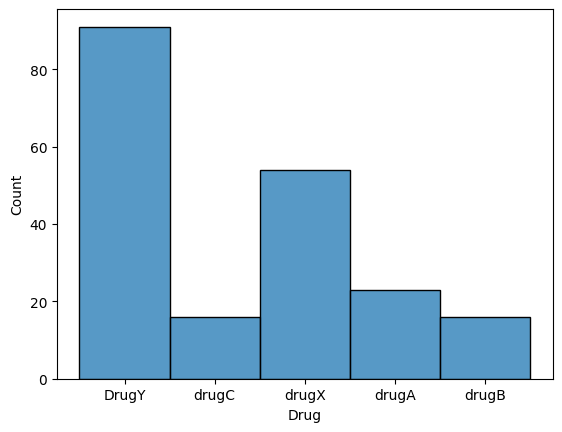

In [113]:
sns.histplot(x='Drug',data=df)

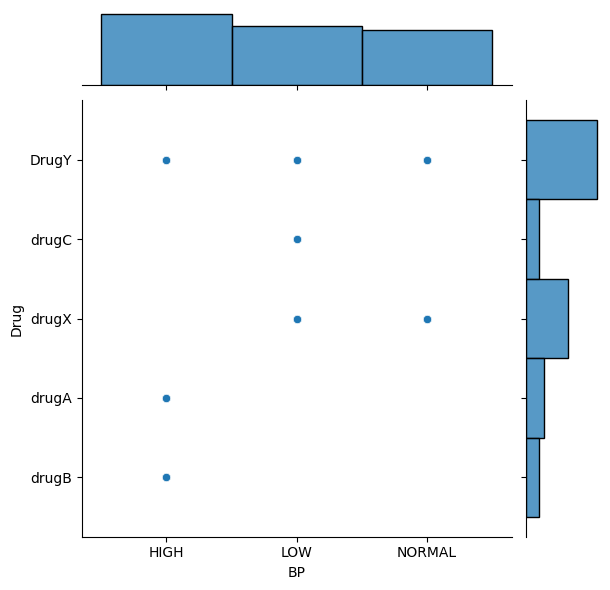

In [114]:
sns.jointplot(x='BP',y='Drug',data=df,kind='scatter')

#DROP UNUSED COLUMNS

In [115]:
new_df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [116]:
# new_df.drop(['COL1','COL2','COL3','COL4','COL5'],axis=1,inplace=True)
# new_df

#DROP ZERO & NEGATIVE VALUES FROM THE OUTPUT COLUMN

In [117]:
#  drop_A=new_df.index[new_df[""] <= 0].tolist()
#  new_df=new_df.drop(new_df.index[drop_A])
#  new_df

# REPLACE THE NA VALUE IN ALL DF TO ZERO VALUE

In [118]:
new_df.fillna(0,inplace=True) # TO FILL NA VALUE BY ZERO
new_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [119]:
new_df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

#PLOT OUTLIERS

<Axes: >

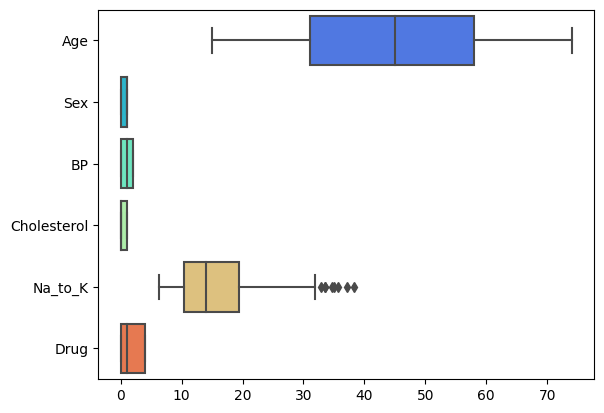

In [120]:
sns.boxplot(data=new_df,palette='rainbow',orient='h')

#SPLIT DATA

In [121]:
x=new_df.loc[:,new_df.columns != 'Drug']
y=new_df['Drug']

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3 ,random_state=42)

#DUPLICATE#

In [123]:
new_df.duplicated().sum()

0

#MODELS#

In [124]:
XGB_REG_mode=XGBRegressor()

#CROSS_VALIDATION

In [125]:
# GKF = GroupKFold(n_splits=3)
# SKGF = StratifiedGroupKFold(n_splits=3)
# GSS = GroupShuffleSplit(n_splits=4, test_size=0.5, random_state=0)
# TSCV = TimeSeriesSplit(n_splits=3)
# LOO = LeaveOneOut()
# SKF = StratifiedKFold(n_splits=3)
# SS = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score=cross_val_score(XGB_REG_mode,x_train,y_train,cv=kf) # kfold

#GRIDE_SEARCH#

In [126]:
params={
 'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]
}

In [127]:
grid_search=GridSearchCV(
    estimator=XGB_REG_mode.fit(x_train,y_train),
    param_grid=params,
    scoring = 'recall',
    n_jobs = 10,cv=2,
    verbose=True
)

In [128]:
grid_search.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:54:59] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:54:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=10,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             scoring='recall', verbose=True)

In [129]:
grid_search.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [130]:

XGB_Class_mode=grid_search.best_estimator_

#RANDOMIZE_SEARCH#

In [131]:
# params = {"max_depth": [3, None],
#               "max_features": randint(1, 9),
#               "min_samples_leaf": randint(1, 9),
#               "criterion": ["gini", "entropy"]}

In [132]:
# random_search=RandomizedSearchCV(
#     estimator=XGB_REG_mode.score(x_test,y_test),
#     param_distributions=params)

In [133]:
# random_search.fit(x_train,y_train)

In [134]:
# random_search.best_params_

In [135]:

# DT_Class_mode=random_search.best_estimator_

#OVERFITTING#

In [136]:
new_df=XGB_REG_mode.fit(x_test, y_test)
new_df=XGB_REG_mode.fit(x_train,y_train)

#PREDICTION#

In [137]:
y_pred_test_XGB=XGB_REG_mode.predict(x_test)
y_pred_train_XGB=XGB_REG_mode.predict(x_train)

#MODEL_PREDICTION#

In [138]:
y_pred_DT=XGB_REG_mode.predict(x_test)

#R2_SCORE_TEST#

In [139]:
score_test=r2_score(y_test,y_pred_test_XGB)*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_test))

Accuracy for our training dataset with tuning is : 100.00%


#R2_SCORE_TRAIN#

In [140]:
score_train=r2_score(y_train,y_pred_train_XGB)*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_train))

Accuracy for our training dataset with tuning is : 100.00%


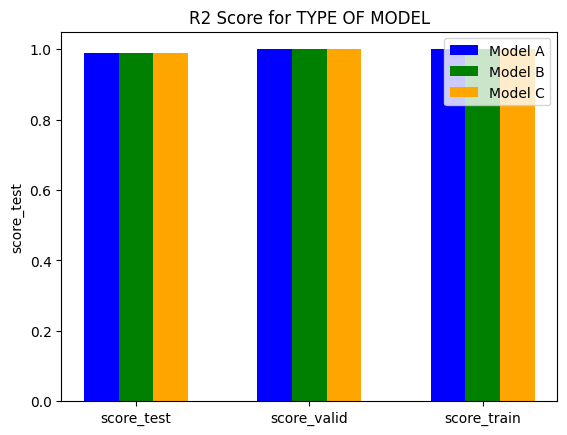

In [141]:
labels = ['score_test', 'score_valid', 'score_train']
model_a = [0.99, 1, 1]
model_b = [0.99, 1, 1]
model_c = [0.99, 1, 1]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
ax.set_ylabel('score_test')
ax.set_title('R2 Score for TYPE OF MODEL')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#PLT_R2_SCORE_TEST_TRAIN#

Text(0.5, 1.0, 'R2 Score for TYPE OF MODEL')

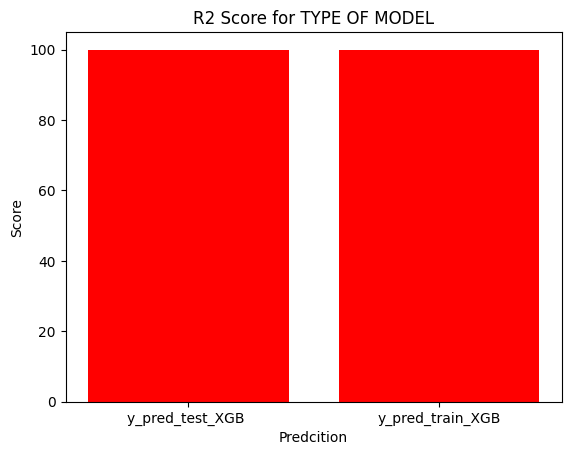

In [142]:
x= ["y_pred_test_XGB ","y_pred_train_XGB"]
y=[score_test ,score_train]
plt.bar(x , y,color='RED')
plt.xlabel("Predcition")
plt.ylabel("Score")
plt.title("R2 Score for TYPE OF MODEL")